In [1]:
import pandas as pd
import numpy as np
from utils import *

config = load_config()
PROJECT_PATH = config.project_path
DATA_PATH = PROJECT_PATH.joinpath("data/processed")

def load_results(name) :
    return pd.read_csv(DATA_PATH.joinpath(f"{name}_evaluation_results.csv"))

mistral = load_results("mistral")
biomistral = load_results("biomistral")
mistral_finetuned = load_results("mistral7b_finetuned")
biomistral_finetuned = load_results("biomistral7b_finetuned")
biomistral7b_avigon = load_results("biomistral7b_avigon")
biomistral7b_avigon_finetuned = load_results("biomistral7b_avigon_finetuned")

In [2]:
df = pd.concat([mistral, mistral_finetuned, biomistral_finetuned, biomistral7b_avigon, biomistral7b_avigon_finetuned])
df.head()

,model,topN,shots,score,value
0,mistral,3,zeroshot,precision,0.247
1,mistral,3,zeroshot,recall,0.331
2,mistral,3,zeroshot,f1,0.283
3,mistral,3,zeroshot,mrr,0.572
4,mistral,5,zeroshot,precision,0.223


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "sans-serif"

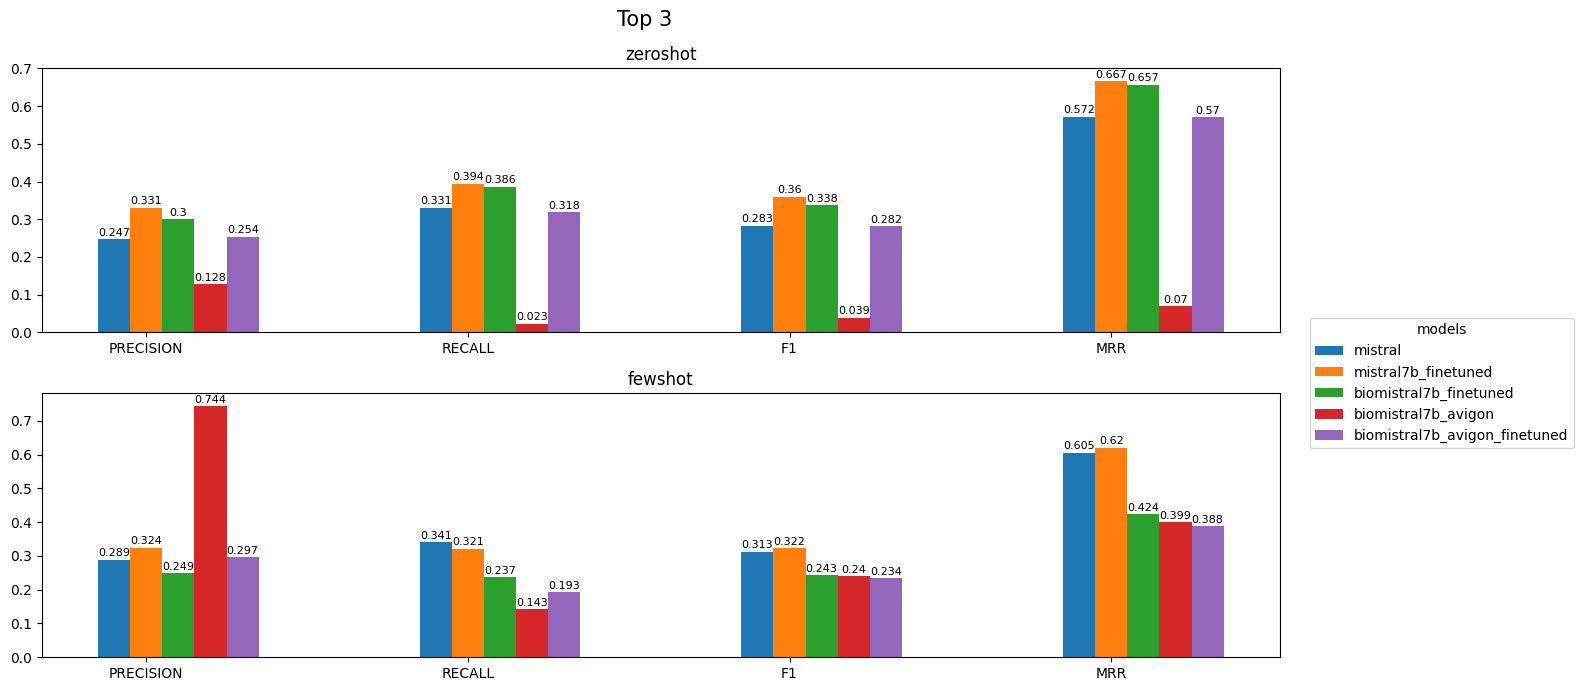

In [5]:
# top 3
top = df[df.topN == 3].copy()

fig, ax = plt.subplots(2,1, figsize=(13,7), sharex=False)

width = 0.1
multiplier = 0

# zeroshot
x = np.arange(len(df.score.unique()))
zero = top[top.shots == 'zeroshot'].copy()
for model in top.model.unique() :
    offset = width * multiplier
    vals = zero[zero.model == model]['value'].values
    rects = ax[0].bar(x + offset, vals, width, label = model)
    ax[0].bar_label(rects, padding=1, fontsize=8)
    ax[0].set_xticks(x + width, zero.score.str.upper().unique())
    ax[0].set_title("zeroshot")
    multiplier += 1


# fewshot
x = np.arange(len(df.score.unique()))
multiplier = 0
few = top[top.shots == 'fewshot'].copy()
for model in top.model.unique() :
    offset = width * multiplier
    vals = few[few.model == model]['value'].values
    rects = ax[1].bar(x + offset, vals, width, label = model)
    ax[1].bar_label(rects, padding=1, fontsize=8)
    ax[1].set_xticks(x + width, top.score.str.upper().unique())
    ax[1].set_title("fewshot")
    multiplier += 1

fig.suptitle("Top 3", fontsize=15)
fig.legend(top.model.unique(), bbox_to_anchor=(1.22, 0.55), title="models")
fig.tight_layout()
plt.show()

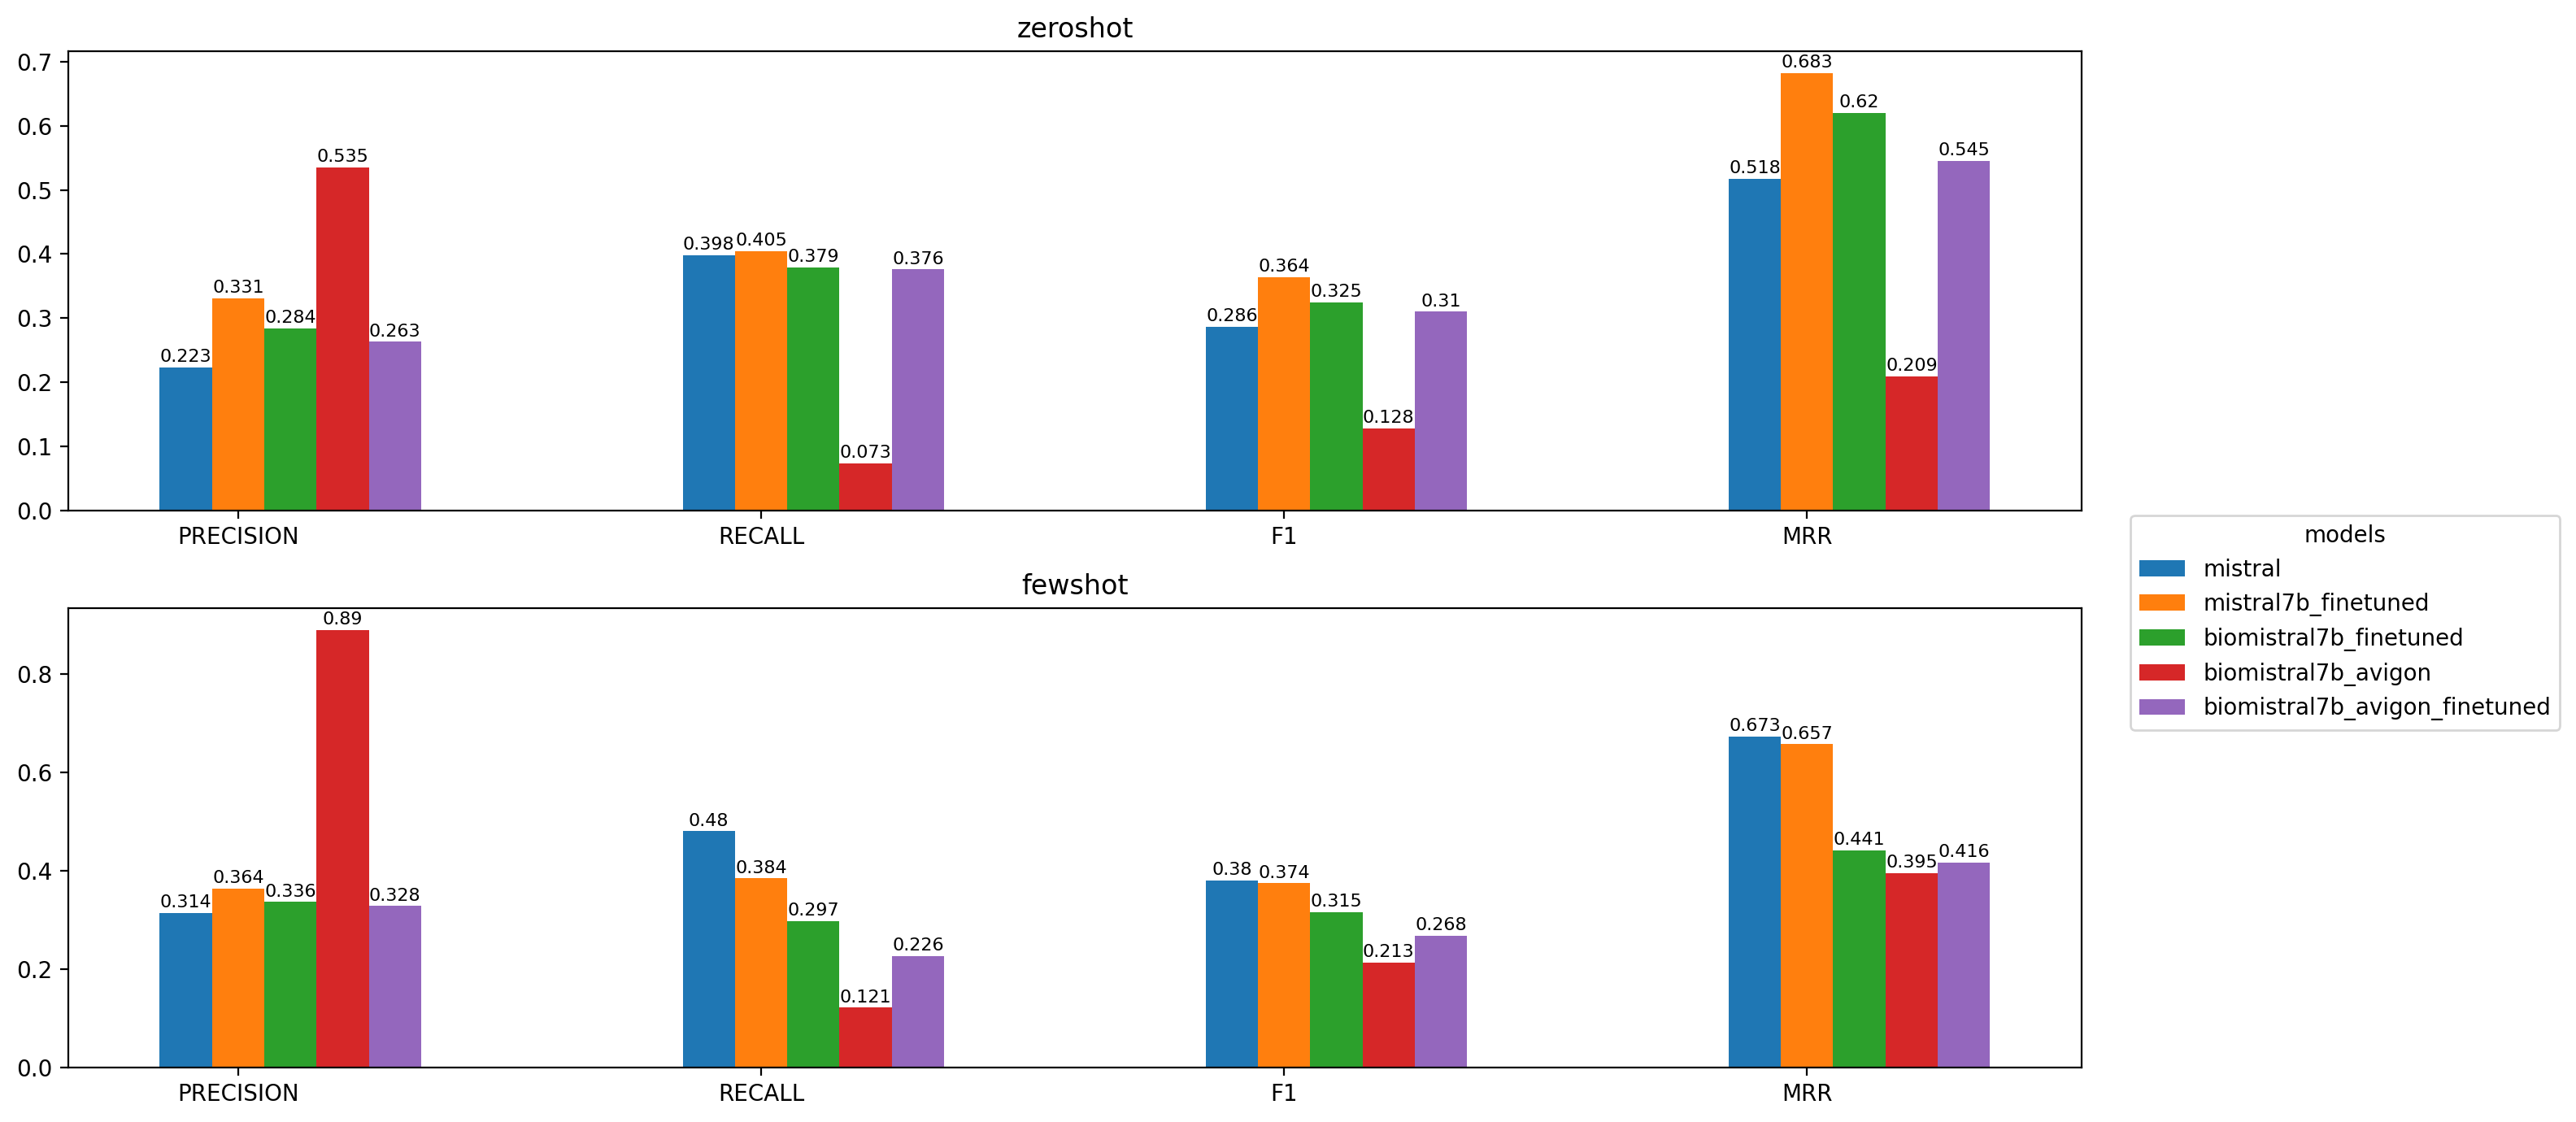

In [6]:
# top 5
top = df[df.topN == 5].copy()

fig, ax = plt.subplots(2,1, figsize=(13,7), sharex=False, dpi=200)

width = 0.1
multiplier = 0

# zeroshot
x = np.arange(len(df.score.unique()))
zero = top[top.shots == 'zeroshot'].copy()
for model in top.model.unique() :
    offset = width * multiplier
    vals = zero[zero.model == model]['value'].values
    rects = ax[0].bar(x + offset, vals, width, label = model)
    ax[0].bar_label(rects, padding=1, fontsize=8)
    ax[0].set_xticks(x + width, top.score.str.upper().unique())
    ax[0].set_title("zeroshot")
    multiplier += 1

# fewshot
x = np.arange(len(df.score.unique()))
multiplier = 0
few = top[top.shots == 'fewshot'].copy()
for model in top.model.unique() :
    offset = width * multiplier
    vals = few[few.model == model]['value'].values
    rects = ax[1].bar(x + offset, vals, width, label = model)
    ax[1].bar_label(rects, padding=1, fontsize=8)
    multiplier += 1
    ax[1].set_xticks(x + width, top.score.str.upper().unique())
    ax[1].set_title("fewshot")

fig.legend(top.model.unique(), bbox_to_anchor=(1.22, 0.55), title="models")
fig.tight_layout()
plt.show()

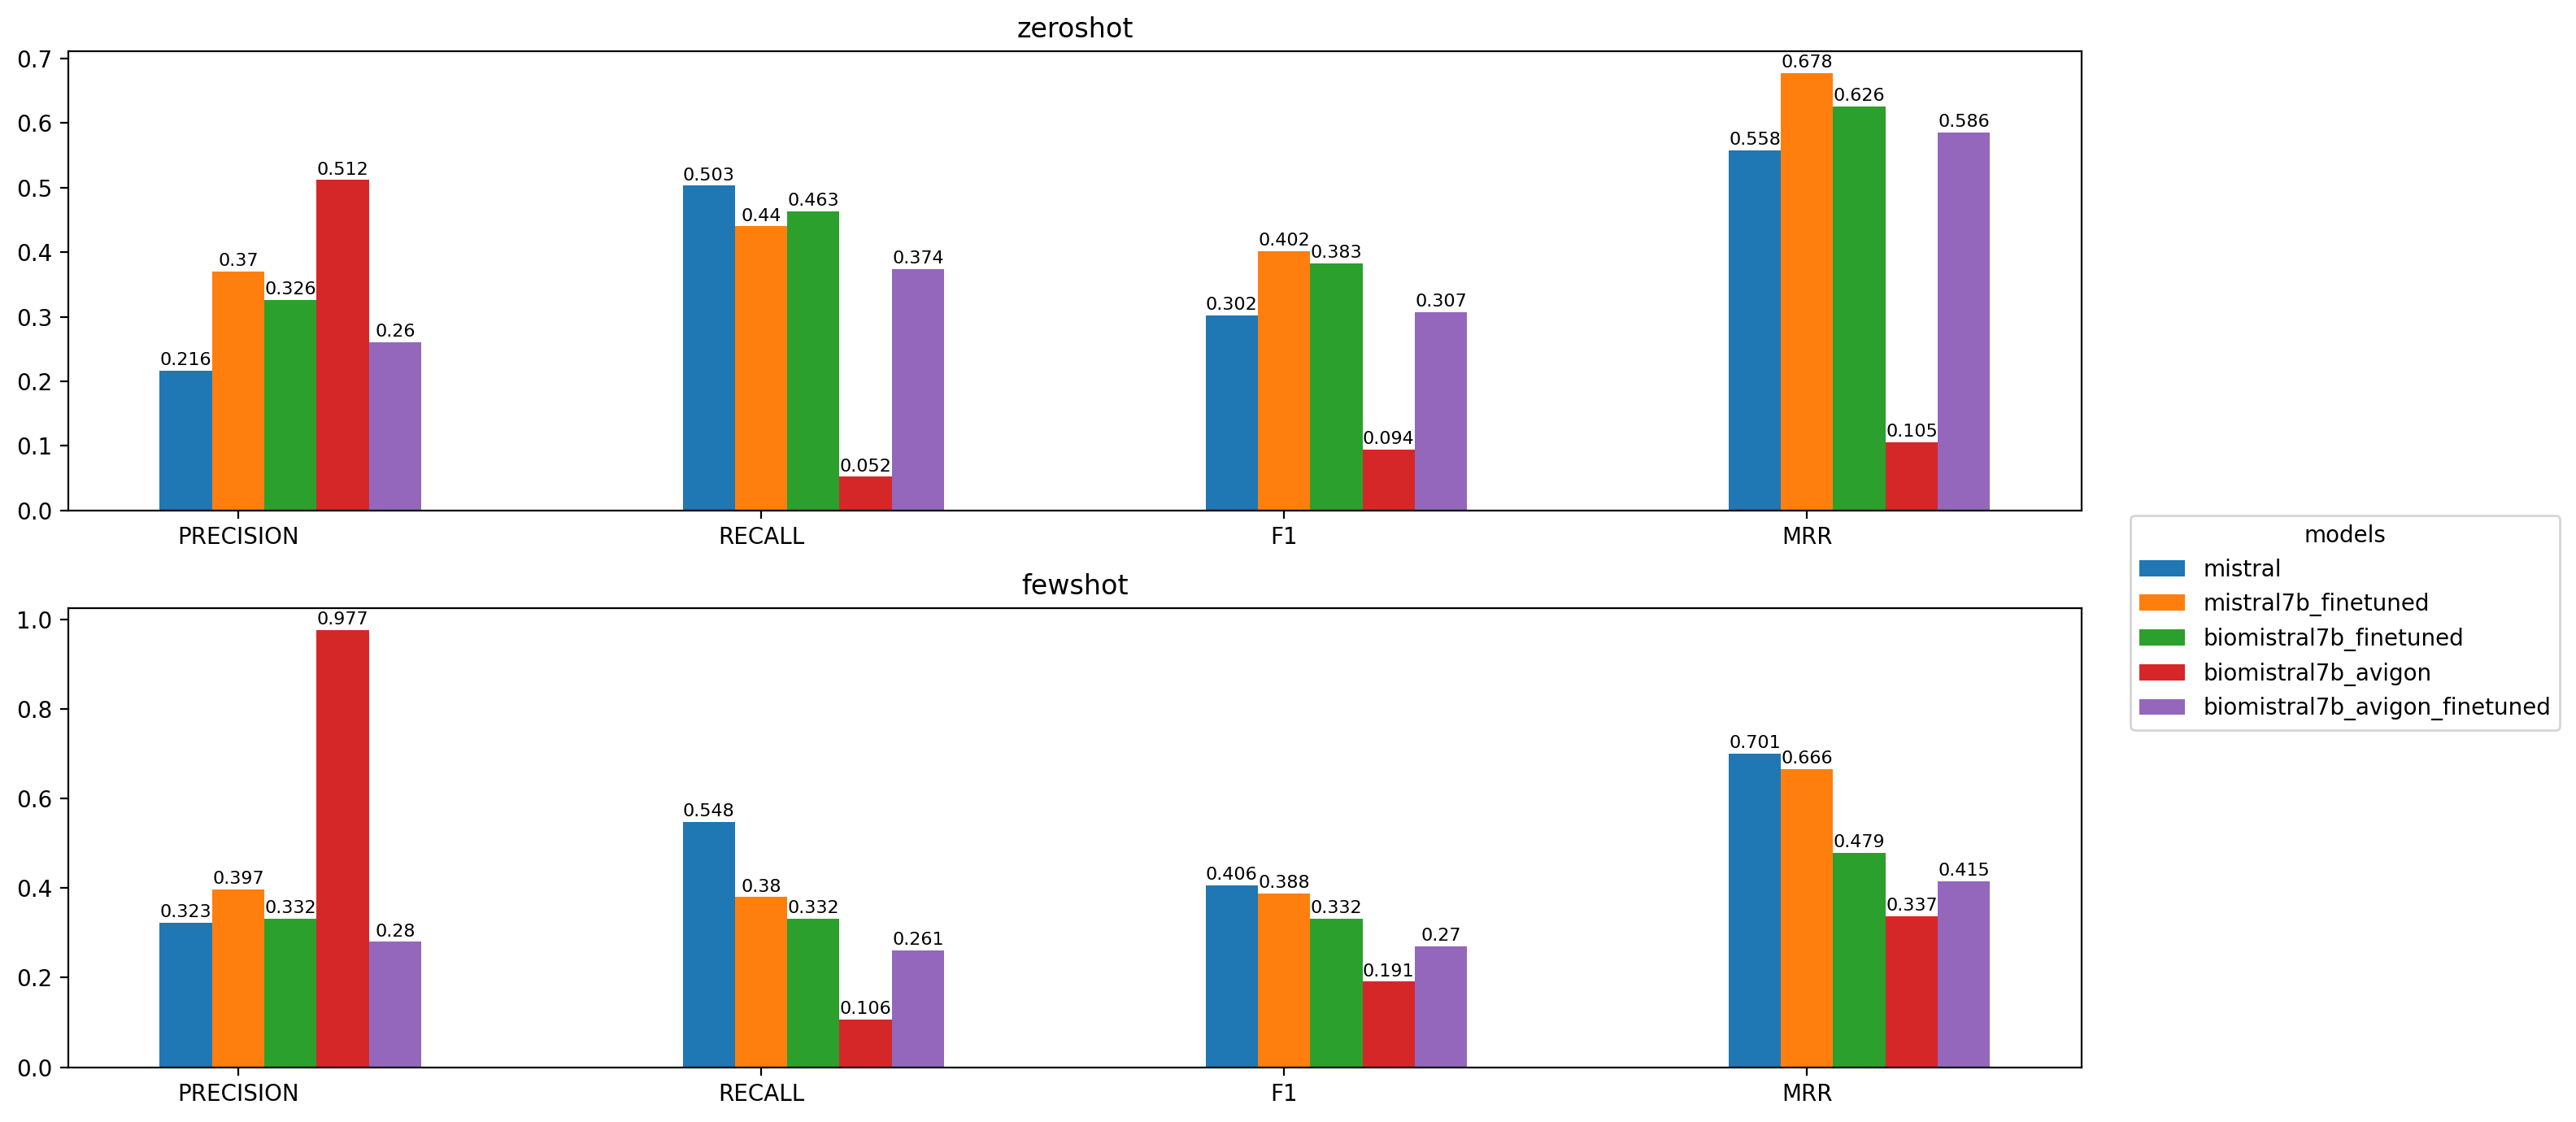

In [7]:
# top 10

top = df[df.topN == 10].copy()

fig, ax = plt.subplots(2,1, figsize=(13,7), sharex=False, dpi=200)

width = 0.1
multiplier = 0

# zeroshot
x = np.arange(len(df.score.unique()))
zero = top[top.shots == 'zeroshot'].copy()
for model in top.model.unique() :
    offset = width * multiplier
    vals = zero[zero.model == model]['value'].values
    rects = ax[0].bar(x + offset, vals, width, label = model)
    ax[0].bar_label(rects, padding=1, fontsize=8)
    ax[0].set_xticks(x + width, top.score.str.upper().unique())
    ax[0].set_title("zeroshot")
    multiplier += 1

# fewshot
x = np.arange(len(df.score.unique()))
multiplier = 0
few = top[top.shots == 'fewshot'].copy()
for model in top.model.unique() :
    offset = width * multiplier
    vals = few[few.model == model]['value'].values
    rects = ax[1].bar(x + offset, vals, width, label = model)
    ax[1].bar_label(rects, padding=1, fontsize=8)
    multiplier += 1
    ax[1].set_xticks(x + width, top.score.str.upper().unique())
    ax[1].set_title("fewshot")

fig.legend(top.model.unique(), bbox_to_anchor=(1.22, 0.55), title="models")
fig.tight_layout()
plt.show()